In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [3]:
#Filling null values by the mean of the AGE
#Filling null values by the mode (Frequently occured data) in the Cabin Column
dataset = pd.read_csv('dataset.csv')
dataset.columns[dataset.isna().any()]
dataset.Age = dataset.Age.fillna(dataset.Age.mean())
dataset.Cabin = dataset.Cabin.fillna(dataset.Cabin.mode().iloc[0])
dataset.columns[dataset.isna().any()]

Index(['Embarked'], dtype='object')

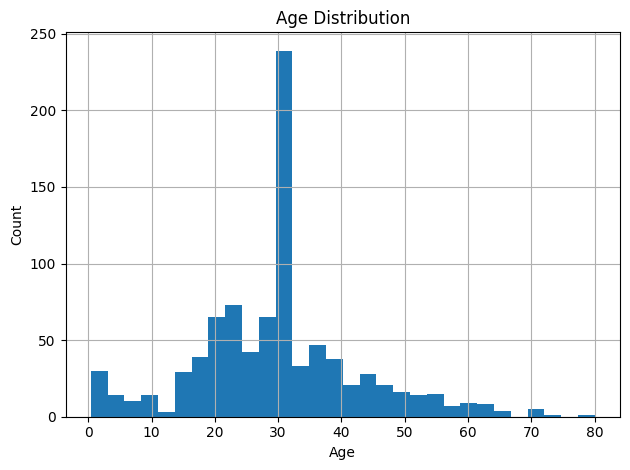

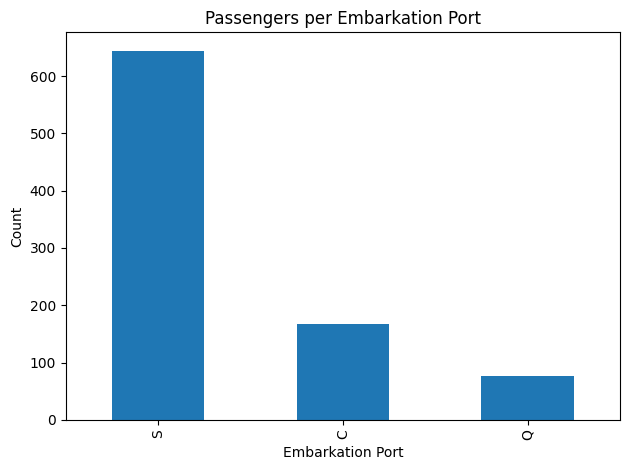

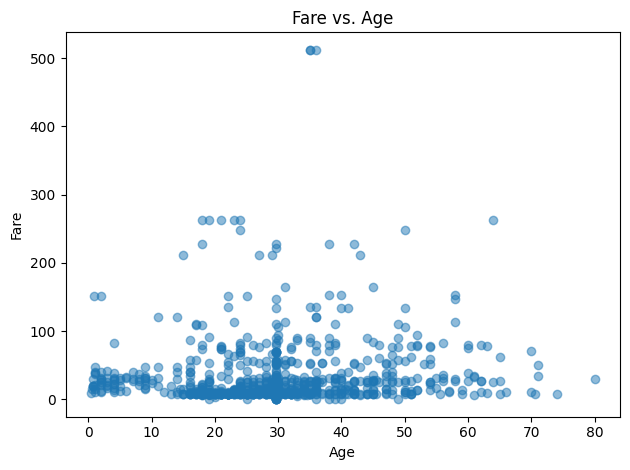

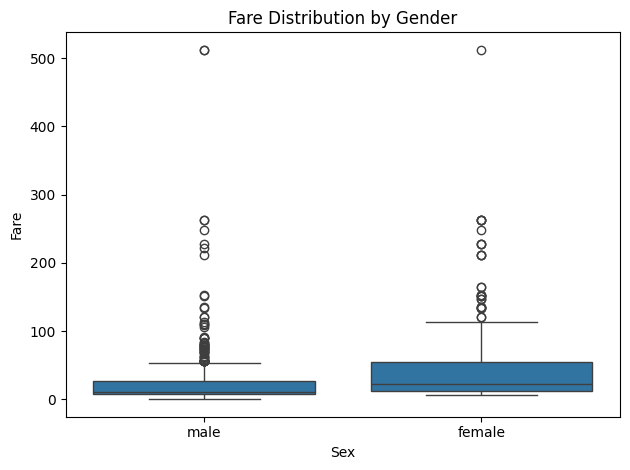

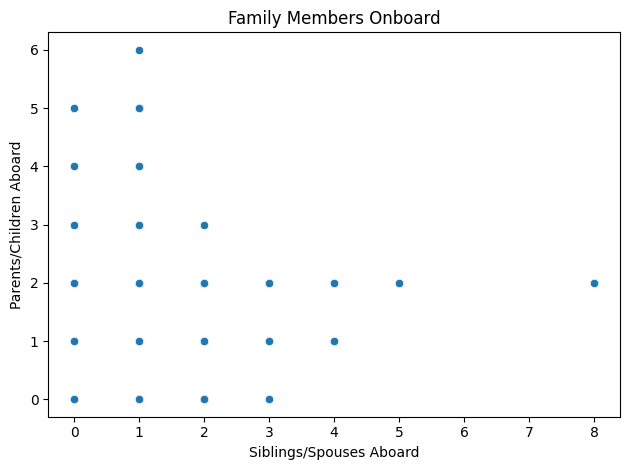

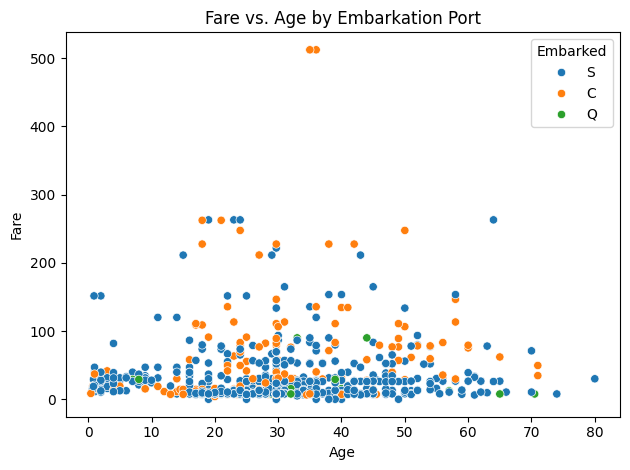

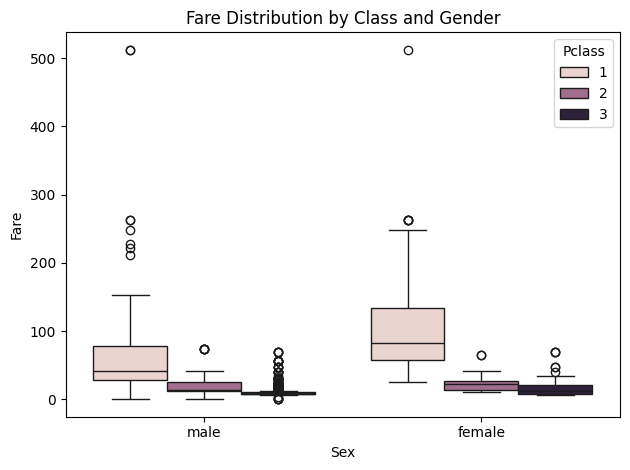

In [4]:
#Univariate Analysis
dataset['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

dataset['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.title('Passengers per Embarkation Port')
plt.tight_layout()
plt.show()

#Bivariate Analysis

plt.scatter(dataset['Age'], dataset['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare vs. Age')
plt.tight_layout()
plt.show()

sns.boxplot(x=dataset['Sex'], y=dataset['Fare'])
plt.title('Fare Distribution by Gender')
plt.tight_layout()
plt.show()

sns.scatterplot(x=dataset['SibSp'], y=dataset['Parch'])
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Parents/Children Aboard')
plt.title('Family Members Onboard')
plt.tight_layout()
plt.show()

#Multivariate Analysis

sns.scatterplot(x=dataset['Age'], y=dataset['Fare'], hue=dataset['Embarked'])
plt.title('Fare vs. Age by Embarkation Port')
plt.tight_layout()
plt.show()

sns.boxplot(x=dataset['Sex'], y=dataset['Fare'], hue=dataset['Pclass'])
plt.title('Fare Distribution by Class and Gender')
plt.tight_layout()
plt.show()

In [5]:
#4. Feature engineering -> Creating a useful feature

dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1 #Family_Size
dataset['Is_Alone'] = (dataset['Family_Size'] == 1).astype(int) #Alone_Traveller
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) #Title_Extraction_from_name -> Mr., Mrs.
dataset['Has_Cabin'] = dataset['Cabin'].notna().astype(int) #Cabin_avaliability
dataset['Fare_Per_Person'] = dataset['Fare'] / dataset['Family_Size'] #Fare_per_person
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']) #Age Binning
dataset['Fare_Group'] = pd.qcut(dataset['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High']) #Fare Binning

print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embarked  Family_Size  Is_Alone  \
0      0         A/5 21171   7.2500  B96 B98        S            2         0   
1      0          PC 17599  71.2833      C85        C            2         0   
2      0  STON/O2. 3101282   7.9250  B96 B98        S            1         1   
